In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
from urllib.request import urlopen
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as ex
import plotly.graph_objs as gp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import folium
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

#Colour codes
conf = '#393e46' 
deth = '#ff2e63'  
cure = '#21bf73'
acti = '#fe9801'

#Extra Libraries
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()   

#To remove the warnings
import warnings
warnings.filterwarnings('ignore')


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/parkinsons-disease-data-set/parkinsons.data
/kaggle/input/parkinsons/parkinsons_updrs.data.csv


In [2]:
df_parkinsons = pd.read_csv('/kaggle/input/parkinsons/parkinsons_updrs.data.csv')

In [3]:
df_parkinsons.head()

,index,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [4]:
df_parkinsons.shape

(5875, 23)

In [5]:
df_parkinsons.isnull().sum()

index            0
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [6]:
df_parkinsons.dropna(axis = 0, inplace = True)

In [7]:
df_parkinsons.isnull().sum()

index            0
subject#         0
age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

In [8]:
df_parkinsons = df_parkinsons.drop('index', axis = 1) 

In [9]:
# Check for duplicates
df_parkinsons.duplicated().sum()

0

In [10]:
df_parkinsons.describe().T.style.background_gradient(axis=0)

,count,mean,std,min,25%,50%,75%,max
subject#,5875.000000,21.494128,12.372279,1.000000,10.000000,22.000000,33.000000,42.000000
age,5875.000000,64.804936,8.821524,36.000000,58.000000,65.000000,72.000000,85.000000
sex,5875.000000,0.317787,0.465656,0.000000,0.000000,0.000000,1.000000,1.000000
test_time,5875.000000,92.863722,53.445602,-4.262500,46.847500,91.523000,138.445000,215.490000
motor_UPDRS,5875.000000,21.296229,8.129282,5.037700,15.000000,20.871000,27.596500,39.511000
total_UPDRS,5875.000000,29.018942,10.700283,7.000000,21.371000,27.576000,36.399000,54.992000
Jitter(%),5875.000000,0.006154,0.005624,0.000830,0.003580,0.004900,0.006800,0.099990
Jitter(Abs),5875.000000,0.000044,0.000036,0.000002,0.000022,0.000035,0.000053,0.000446
Jitter:RAP,5875.000000,0.002987,0.003124,0.000330,0.001580,0.002250,0.003290,0.057540
Jitter:PPQ5,5875.000000,0.003277,0.003732,0.000430,0.001820,0.002490,0.003460,0.069560


In [11]:
age_range = f"Age Range: {df_parkinsons['age'].min()} - {df_parkinsons['age'].max()}"
print(age_range)

Age Range: 36 - 85


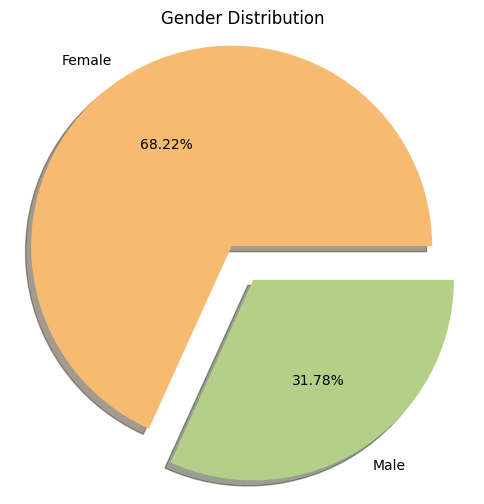

In [12]:
gender_counts = df_parkinsons['sex'].value_counts()
gender_dict = {"Female": gender_counts[0], "Male": gender_counts[1]}
colors=['#f6ba71','#b4cf88']
plt.figure(figsize=(6, 6))
plt.pie(gender_dict.values(), labels=gender_dict.keys(), colors=colors, shadow=True, explode=(0.1, 0.1), autopct='%1.2f%%')
plt.title("Gender Distribution")
plt.axis('equal')
plt.show()

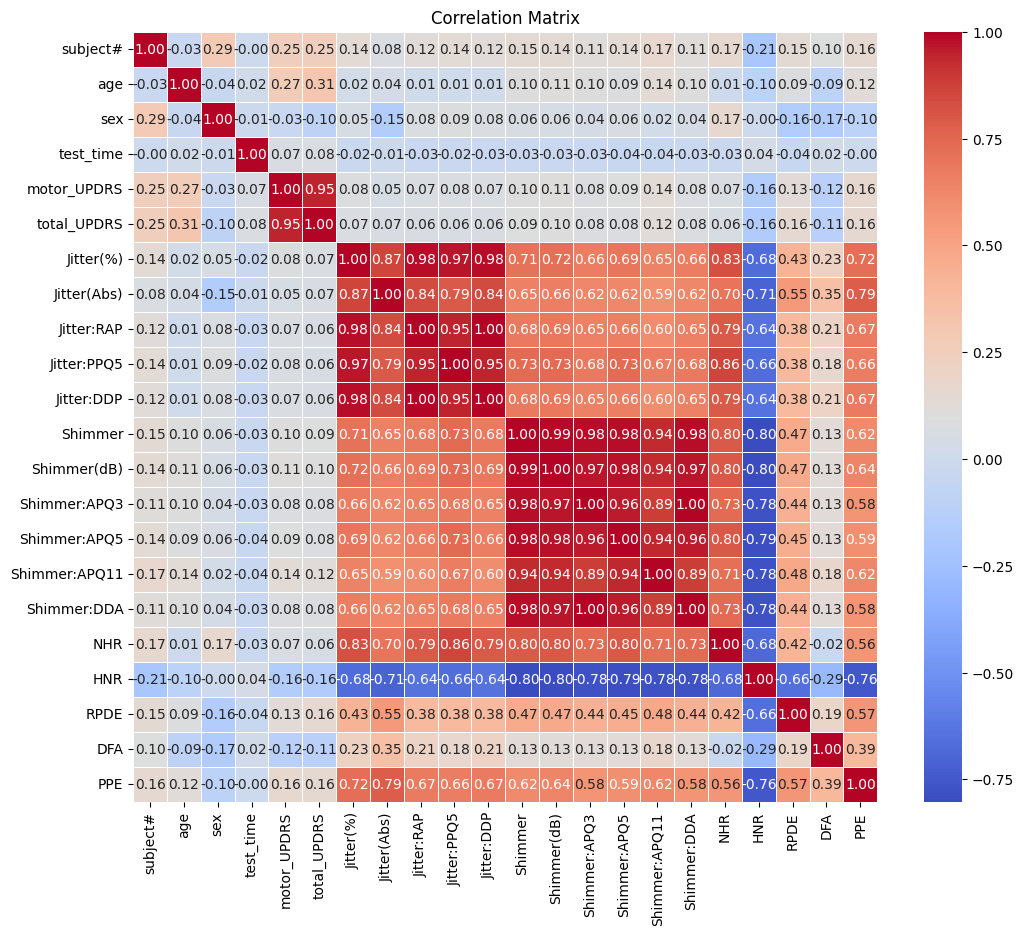

In [13]:
# Correlation matrix
corr_matrix = df_parkinsons.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

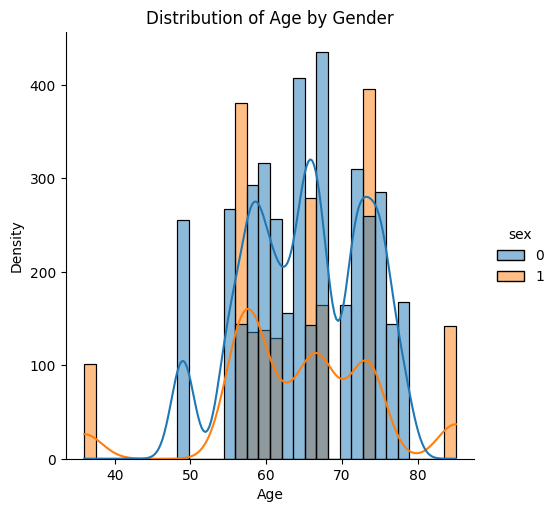

In [14]:
# Distribution of age and gender
sns.displot(data=df_parkinsons, x='age', hue='sex', kde=True)
plt.title('Distribution of Age by Gender')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()



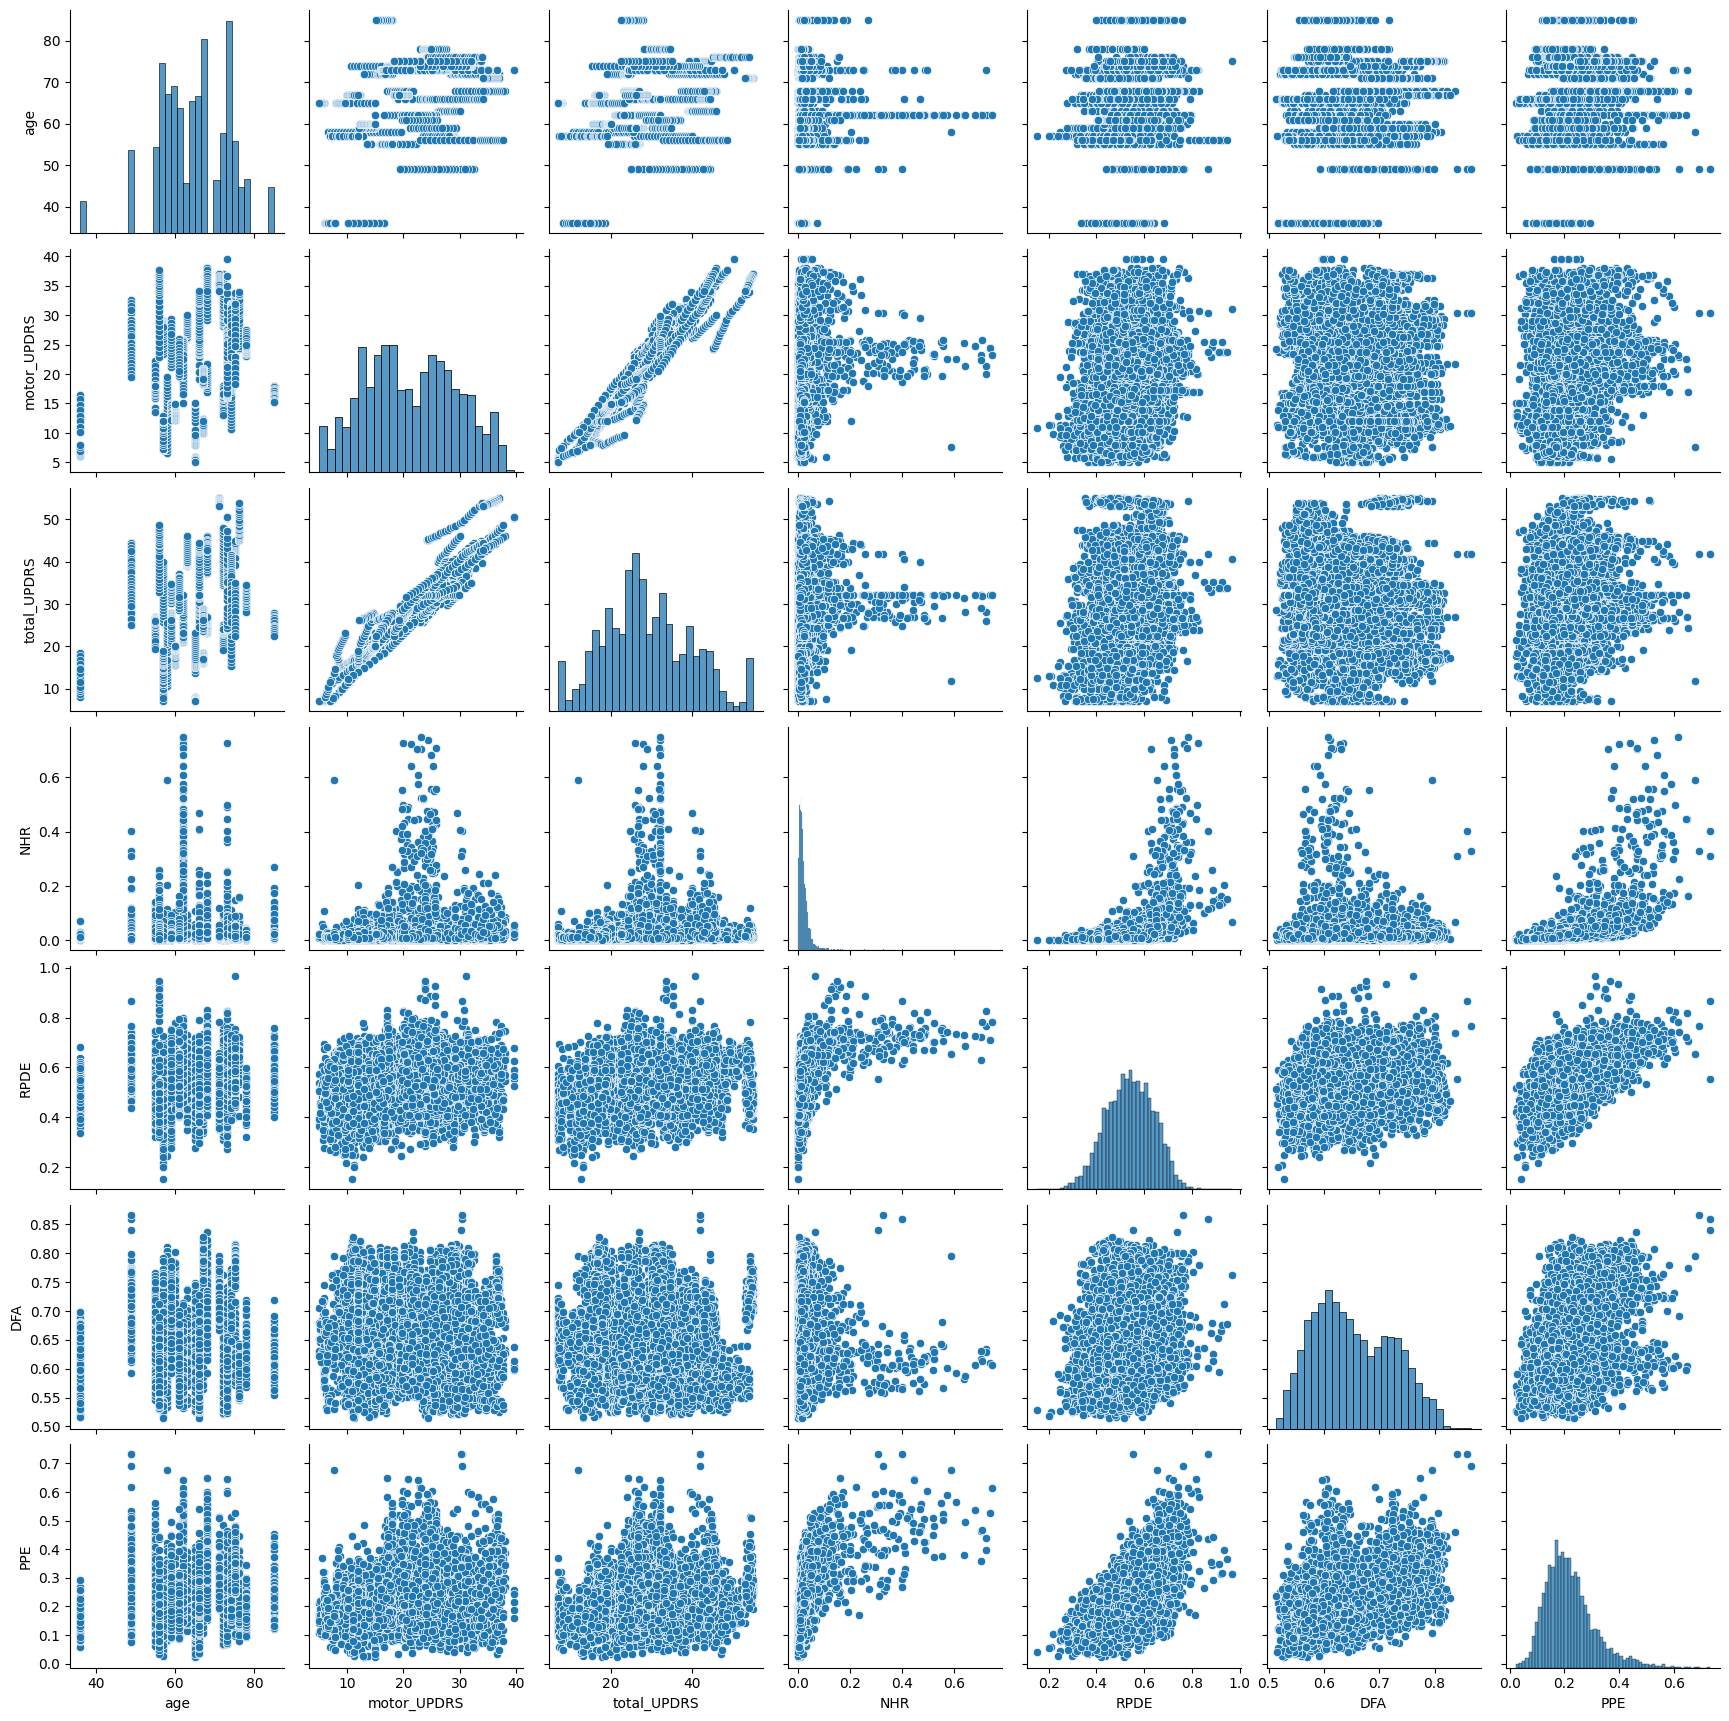

In [15]:
# Pairplot for selected features
sns.pairplot(df_parkinsons[['age', 'motor_UPDRS', 'total_UPDRS', 'NHR', 'RPDE', 'DFA', 'PPE']])
plt.show()

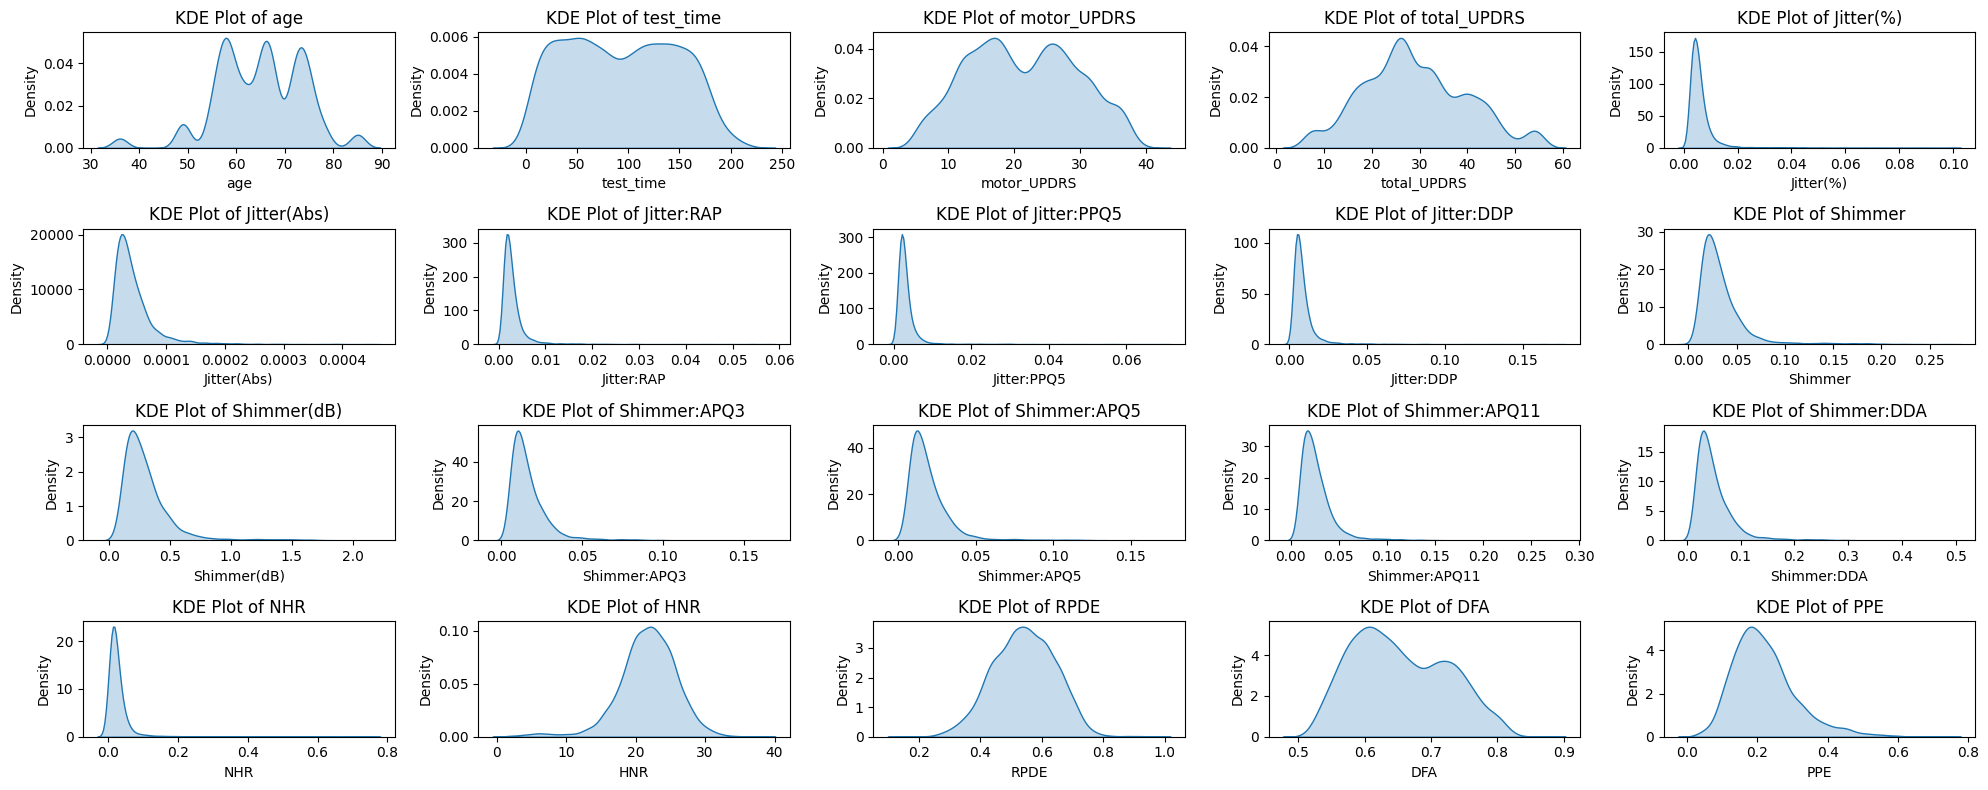

In [16]:
numerical_features = ['age', 'test_time', 'motor_UPDRS', 'total_UPDRS', 'Jitter(%)', 'Jitter(Abs)', 'Jitter:RAP',
                      'Jitter:PPQ5', 'Jitter:DDP', 'Shimmer', 'Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
                      'Shimmer:APQ11', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'PPE']
categorical_features = ['sex']

# Plot KDE plots for numerical features
plt.figure(figsize=(20, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 5, i)
    sns.kdeplot(df_parkinsons[feature], shade=True)
    plt.title(f'KDE Plot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()

In [17]:
def binary_encode(df, column, positive_value):
    df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)

# Apply binary encoding to relevant fields
binary_encode(df_parkinsons, 'sex', 'M')  # 'M' as the positive value


df_parkinsons.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


In [20]:
X = df_parkinsons.drop('total_UPDRS', axis=1)
y = df_parkinsons['total_UPDRS']

In [21]:
# Initialize SelectKBest with f_classif scoring function (suitable for classification)
selector = SelectKBest(score_func=f_classif, k='all')  # Set k='all' to get scores for all features

# Fit selector to data
selector.fit(X, y)

# Get feature scores
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

# Sort feature scores by descending order
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

# Sort the DataFrame by scores in descending order
feature_scores_sorted = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Create a colored table output
styled_table = feature_scores_sorted.style.background_gradient(cmap='OrRd')
styled_table

,Feature,Score
0,motor_UPDRS,2216.740969
1,subject#,258.615251
2,test_time,210.433777
3,age,187.423527
4,DFA,24.773958
5,HNR,10.970201
6,RPDE,8.712824
7,Shimmer:APQ11,7.232230
8,Shimmer:APQ5,7.069435
9,Shimmer(dB),7.030897


In [22]:
# Select the top 'k' features based on the scores
k = 10  # Set the desired number of features
top_features = feature_scores.nlargest(k, 'Score')['Feature'].tolist()

# Select only the top 'k' features from the original dataset
X_selected = X[top_features]


In [24]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model on the training data
model.fit(X_train, y_train)

# Predicting on the test data
y_pred = model.predict(X_test)

# Calculating mean squared error as a metric
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 10.062620330774019


In [ ]:

# Split the dataset into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_train = svm_model.predict(X_train_scaled)
y_pred_test = svm_model.predict(X_test_scaled)

# Evaluate the model
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_pred_test))

In [ ]:
# Training the k-NN model
k = 5  # Example value for k
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Making predictions
y_pred = knn.predict(X_test_scaled)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)